In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# models
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from wittgenstein import RIPPER

from sklearn.model_selection import cross_val_score
from sklearn.metrics import (classification_report,
                             precision_recall_fscore_support)

from utils.constants import STAGE_DIR, ANALYSIS_DIR
from utils.dataload import load_data
from utils.functions import split_train_test, tree_structure
from utils.plots import decision_boundary_plot
from utils.transformers import SequentialFeatureSelectorTransformer

# Configuration

In [3]:
RUN_WRAPPER_SELECTION = True
RESAMPLED = True

SUFIX = '_resampled' if RESAMPLED else ''

# Load data

In [4]:
# Load all dataset
X_all = load_data(
    STAGE_DIR / 'preprocess' / f'X_train{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using univariate analysis
X_mi = load_data(
    STAGE_DIR / 'selection' / f'X_train_mi{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

X_x2 = load_data(
    STAGE_DIR / 'selection' / f'X_train_x2{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

X_anova = load_data(
    STAGE_DIR / 'selection' / f'X_train_anova{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

# Load selected dataset using multivariate analysis
X_relief = load_data(
    STAGE_DIR / 'selection' / f'X_train_relief{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

In [5]:
y = load_data(
    STAGE_DIR / 'preprocess' / f'y{SUFIX}.parquet',
    load_func=pd.read_parquet).sort_index()

In [6]:
X_train_all, X_test_all, y_train_all, y_test_all = split_train_test(X_all, y)
X_train_mi, X_test_mi, y_train_mi, y_test_mi = split_train_test(X_mi, y)
X_train_x2, X_test_x2, y_train_x2, y_test_x2 = split_train_test(X_x2, y)
X_train_anova, X_test_anova, y_train_anova, y_test_anova = split_train_test(X_anova, y)
X_train_relief, X_test_relief, y_train_relief, y_test_relief = split_train_test(X_relief, y)

# Support Vector Machine

The training occurs in a SVM model with polynomial kernel. The in-sample scores are calculated using a cross validation method with 5 validation steps. The accuracy is used as the metric to evaluate the model performance.

## All features

### Training and score in the sample (80% - 0.01 std)

In [ ]:
svm_all = SVC(kernel='poly')
svm_all_scores = cross_val_score(
    svm_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_all_scores.mean(),
    svm_all_scores.std())
)

### Out-of-sample score

In [ ]:
svm_all = SVC(kernel='poly').fit(X_train_all, y_train_all['y'])
y_test_predict_all = svm_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_all))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_all, y_train_all,
    'SVM with all features'
)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'db_svm_all{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Univariate - Mutual Information

### Training and score in the sample (80% - 0.01 std)

In [ ]:
svm_mi = SVC(kernel='poly')
svm_mi_scores = cross_val_score(
    svm_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_mi_scores.mean(),
    svm_mi_scores.std())
)

### Out-of-sample score

In [ ]:
svm_mi = SVC(kernel='poly').fit(X_train_mi, y_train_mi['y'])
y_test_predict_mi = svm_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_mi))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_mi, y_train_mi,
    'SVM with selected features (MI)'
)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'db_svm_mi{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [ ]:
svm_x2 = SVC(kernel='poly')
svm_x2_scores = cross_val_score(
    svm_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_x2_scores.mean(),
    svm_x2_scores.std())
)

### Out-of-sample score

In [ ]:
svm_x2 = SVC(kernel='poly').fit(X_train_x2, y_train_x2['y'])
y_test_predict_x2 = svm_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_x2))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_x2, y_train_x2,
    'SVM with selected features (X2)'
)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'db_svm_x2{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Univariate - ANOVA

### Training and score in the sample (80% - 0.02 std)

In [ ]:
svm_anova = SVC(kernel='poly')
svm_anova_scores = cross_val_score(
    svm_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_anova_scores.mean(),
    svm_anova_scores.std())
)

### Out-of-sample score

In [ ]:
svm_anova = SVC(kernel='poly').fit(X_train_anova, y_train_anova['y'])
y_test_predict_anova = svm_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_anova))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_anova, y_train_anova,
    'SVM with selected features (ANOVA)'
)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'db_svm_anova{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Multivariate - Relief

### Training and score in the sample (78% - 0.1 std)

In [ ]:
svm_relief = SVC(kernel='poly')
svm_relief_scores = cross_val_score(
    svm_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_relief_scores.mean(),
    svm_relief_scores.std())
)

### Out-of-sample score

In [ ]:
svm_relief = SVC(kernel='poly').fit(X_train_relief, y_train_relief['y'])
y_test_predict_relief = svm_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_relief))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_relief, y_train_relief,
    'SVM with selected features (RELIEF)'
)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'db_svm_relief{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Wrapper

### Select features

In [ ]:
if RUN_WRAPPER_SELECTION:
    svm_wrapper = SVC(kernel='poly')

    svm_fs_wrapper = SequentialFeatureSelectorTransformer(
        svm_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_svm_wrapper = svm_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_svm_wrapper, X_test_svm_wrapper, y_train_svm_wrapper, y_test_svm_wrapper = split_train_test(X_svm_wrapper, y)

    X_svm_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_svm.parquet')

### Training and score in the sample (80% - 0.1 std)

In [ ]:
if not RUN_WRAPPER_SELECTION:
    X_svm_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_svm.parquet')
    X_train_svm_wrapper, X_test_svm_wrapper, y_train_svm_wrapper, y_test_svm_wrapper = split_train_test(X_svm_wrapper, y)

In [ ]:
svm_wrapper_scores = cross_val_score(
    svm_wrapper,
    X_train_svm_wrapper,
    y_train_svm_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    svm_wrapper_scores.mean(),
    svm_wrapper_scores.std())
)

### Out-of-sample score

In [ ]:
svm_wrapper = SVC(kernel='poly').fit(X_train_svm_wrapper, y_train_svm_wrapper['y'])
y_test_predict_svm_wrapper = svm_wrapper.predict(X_test_svm_wrapper)

print(classification_report(y_test_svm_wrapper['y'], y_test_predict_svm_wrapper))

### Decision boundary

In [ ]:
decision_boundary_plot(
    SVC(kernel='poly'),
    X_train_svm_wrapper, y_train_svm_wrapper,
    'SVM with selected features (SFS)'
)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'db_svm_wrapper{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Metrics summary

In [ ]:
y_true_prediction_svm = [
    (y_test_all, y_test_predict_all),
    (y_test_mi, y_test_predict_mi),
    (y_test_x2, y_test_predict_x2),
    (y_test_anova, y_test_predict_anova),
    (y_test_relief, y_test_predict_relief),
    # (y_test_svm_wrapper, y_test_predict_svm_wrapper),
]

metrics_svm_summary = pd.DataFrame(
    [precision_recall_fscore_support(y_true, y_predict, average='macro')[:-1]
     for y_true, y_predict in y_true_prediction_svm],
    index=[
        'All features',
        'Mutual information',
        'Chi squared',
        'ANOVA',
        'RELIEF',
        # 'Wrapper',
    ],
    columns=[
        'Precision', 'Recall', 'F-score'
    ]
)

metrics_svm_summary

In [ ]:
sns.lineplot(
    metrics_svm_summary.sort_values(['Precision', 'Recall', 'F-score']),
)
plt.xticks(rotation=20)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'metrics' / f'metrics_svm{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Decision boundary summary

In [ ]:
db_informations = [
    ('all', X_train_all, y_train_all),
    ('mi', X_train_mi, y_train_mi),
    ('x2', X_train_x2, y_train_x2),
    ('anova', X_train_anova, y_train_anova),
    ('relief', X_train_relief, y_train_relief),
    # ('wrapper', X_train_svm_wrapper, y_train_svm_wrapper),
]

fig, axs = plt.subplots(3, 2, figsize=(10, 10), sharey=True, sharex=True)
fig.suptitle('SVM Decision Boundaries')
for i, (name, X_train, y_train) in enumerate(db_informations):
    x, y = i // 2, i % 2
    decision_boundary_plot(
        SVC(kernel='poly'),
        X_train, y_train,
        name.title(),
        ax=axs[x][y]
    )

# Classification Tree

We use a Decision Tree model with entropy criterion and 10 levels of depth. The in-sample scores are calculated using a cross validation method with 5 folds. The accuracy is used as the metric to evaluate the model performance.

In [ ]:
tree_parameters = {
    'criterion': 'entropy',
    'max_depth': 5
}

## All features

### Training and score in the sample (78% - 0.00 std)

In [ ]:
tree_all = DecisionTreeClassifier(**tree_parameters)
tree_all_scores = cross_val_score(
    tree_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_all_scores.mean(),
    tree_all_scores.std())
)

### Out-of-sample score

In [ ]:
tree_all = DecisionTreeClassifier(**tree_parameters).fit(X_train_all, y_train_all['y'])
y_test_predict_tree_all = tree_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_tree_all))

### Tree structure

In [ ]:
tree_structure(tree_all, X_train_all.columns.values)

In [ ]:
fig = plt.figure(figsize=(63, 40))
_ = plot_tree(tree_all,
              feature_names=X_train_all.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'tree_all{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Univariate - Mutual Information

### Training and score in the sample (78% - 0.01 std)

In [ ]:
tree_mi = DecisionTreeClassifier(**tree_parameters)
tree_mi_scores = cross_val_score(
    tree_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_mi_scores.mean(),
    tree_mi_scores.std())
)

### Out-of-sample score

In [ ]:
tree_mi = DecisionTreeClassifier(**tree_parameters).fit(X_train_mi, y_train_mi['y'])
y_test_predict_tree_mi = tree_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_tree_mi))

### Tree structure

In [ ]:
tree_structure(tree_mi, X_train_mi.columns.values)

In [ ]:
fig = plt.figure(figsize=(53, 40))
_ = plot_tree(tree_mi,
              feature_names=X_train_mi.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'tree_mi{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [ ]:
tree_x2 = DecisionTreeClassifier(**tree_parameters)
tree_x2_scores = cross_val_score(
    tree_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_x2_scores.mean(),
    tree_x2_scores.std())
)

### Out-of-sample score

In [ ]:
tree_x2 = DecisionTreeClassifier(
        **tree_parameters
    ).fit(X_train_x2, y_train_x2['y'])
y_test_predict_tree_x2 = tree_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_tree_x2))

### Tree structure

In [ ]:
tree_structure(tree_x2, X_train_x2.columns.values)

In [ ]:
fig = plt.figure(figsize=(75, 40))
_ = plot_tree(tree_x2,
              feature_names=X_train_x2.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'tree_x2{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Univariate - ANOVA

### Training and score in the sample (78% - 0.01 std)

In [ ]:
tree_anova = DecisionTreeClassifier(**tree_parameters)
tree_anova_scores = cross_val_score(
    tree_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_anova_scores.mean(),
    tree_anova_scores.std())
)

### Out-of-sample score

In [ ]:
tree_anova = DecisionTreeClassifier(
    **tree_parameters
).fit(X_train_anova, y_train_anova['y'])
y_test_predict_tree_anova = tree_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_tree_anova))

### Tree structure

In [ ]:
tree_structure(tree_anova, X_train_anova.columns.values)

In [ ]:
fig = plt.figure(figsize=(45, 40))
_ = plot_tree(tree_anova,
              feature_names=X_train_anova.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'tree_anova{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Multivariate - Relief

### Training and score in the sample (77% - 0.01 std)

In [ ]:
tree_relief = DecisionTreeClassifier(**tree_parameters)
tree_relief_scores = cross_val_score(
    tree_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_relief_scores.mean(),
    tree_relief_scores.std())
)

### Out-of-sample score

In [ ]:
tree_relief = DecisionTreeClassifier(**tree_parameters).fit(X_train_relief, y_train_relief['y'])
y_test_predict_tree_relief = tree_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_tree_relief))

### Tree structure

In [ ]:
tree_structure(tree_relief, X_train_relief.columns.values)

In [ ]:
fig = plt.figure(figsize=(48, 40))
_ = plot_tree(tree_relief,
              feature_names=X_train_relief.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'tree_relief{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Wrapper

### Select features

In [ ]:
if RUN_WRAPPER_SELECTION:
    tree_wrapper = DecisionTreeClassifier()

    tree_fs_wrapper = SequentialFeatureSelectorTransformer(
        tree_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_tree_wrapper = tree_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_tree_wrapper, X_test_tree_wrapper, y_train_tree_wrapper, y_test_tree_wrapper = split_train_test(X_tree_wrapper, y)
    X_tree_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_tree.parquet')

### Training and score in the sample (79% - 0.01 std)

In [ ]:
if not RUN_WRAPPER_SELECTION:
    X_tree_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_tree.parquet')
    X_train_tree_wrapper, X_test_tree_wrapper, y_train_tree_wrapper, y_test_tree_wrapper = split_train_test(X_tree_wrapper, y)

In [ ]:
tree_wrapper = DecisionTreeClassifier(**tree_parameters)
tree_wrapper_scores = cross_val_score(
    tree_wrapper,
    X_train_tree_wrapper,
    y_train_tree_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    tree_wrapper_scores.mean(),
    tree_wrapper_scores.std())
)

### Out-of-sample score

In [ ]:
tree_wrapper = DecisionTreeClassifier(**tree_parameters).fit(X_train_tree_wrapper, y_train_tree_wrapper['y'])
y_test_predict_tree_wrapper = tree_wrapper.predict(X_test_tree_wrapper)

print(classification_report(y_test_tree_wrapper['y'], y_test_predict_tree_wrapper))

### Tree structure

In [ ]:
tree_structure(tree_wrapper, X_train_tree_wrapper.columns.values)

In [ ]:
fig = plt.figure(figsize=(53, 40))
_ = plot_tree(tree_wrapper,
              feature_names=X_train_tree_wrapper.columns,  
              class_names=['non-poor', 'poor'],
              filled=True,
              fontsize=10)

In [ ]:
fig.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'tree_wrapper{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

## Metrics summary

In [ ]:
y_true_prediction_tree = [
    (y_test_all, y_test_predict_tree_all),
    (y_test_mi, y_test_predict_tree_mi),
    (y_test_x2, y_test_predict_tree_x2),
    (y_test_anova, y_test_predict_tree_anova),
    (y_test_relief, y_test_predict_tree_relief),
    (y_test_tree_wrapper, y_test_predict_tree_wrapper),
]

metrics_tree_summary = pd.DataFrame(
    [precision_recall_fscore_support(y_true, y_predict, average='macro')[:-1]
     for y_true, y_predict in y_true_prediction_tree],
    index=[
        'All features',
        'Mutual information',
        'Chi squared',
        'ANOVA',
        'RELIEF',
        'Wrapper',
    ],
    columns=[
        'Precision', 'Recall', 'F-score'
    ]
)

metrics_tree_summary

In [ ]:
sns.lineplot(
    metrics_tree_summary.sort_values(['Precision', 'Recall', 'F-score']),
)
plt.xticks(rotation=20)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'metrics' / f'metrics_tree{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

# Rule Induction - RIPPER

The RIPPER algorithm builds a set of rules given a training data. We use the default parameters. The in-sample scores are calculated using a cross validation method with 5 folds. The accuracy is used as the metric to evaluate the model performance. 

## All features

### Training and score in the sample (78% - 0.00 std)

In [ ]:
ripper_all = RIPPER()
ripper_all_scores = cross_val_score(
    ripper_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_all_scores.mean(),
    ripper_all_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_all = RIPPER()
ripper_all.fit(X_train_all, y_train_all['y'])
y_test_predict_ripper_all = ripper_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_ripper_all))

### Ruleset

In [ ]:
ripper_all.out_model()

## Univariate - Mutual Information

### Training and score in the sample (79% - 0.01 std)

In [ ]:
ripper_mi = RIPPER()
ripper_mi_scores = cross_val_score(
    ripper_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_mi_scores.mean(),
    ripper_mi_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_mi = RIPPER()
ripper_mi.fit(X_train_mi, y_train_mi['y'])
y_test_predict_ripper_mi = ripper_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_ripper_mi))

### Ruleset

In [ ]:
ripper_mi.out_model()

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.02 std)

In [ ]:
ripper_x2 = RIPPER()
ripper_x2_scores = cross_val_score(
    ripper_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_x2_scores.mean(),
    ripper_x2_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_x2 = RIPPER()
ripper_x2.fit(X_train_x2, y_train_x2['y'])
y_test_predict_ripper_x2 = ripper_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_ripper_x2))

### Ruleset

In [ ]:
ripper_x2.out_model()

## Univariate - ANOVA

### Training and score in the sample (79% - 0.01 std)

In [ ]:
ripper_anova = RIPPER()
ripper_anova_scores = cross_val_score(
    ripper_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_mi_scores.mean(),
    ripper_mi_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_anova = RIPPER()
ripper_anova.fit(X_train_anova, y_train_anova['y'])
y_test_predict_ripper_anova = ripper_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_ripper_anova))

### Ruleset

In [ ]:
ripper_anova.out_model()

## Multivariate - Relief

### Training and score in the sample (77% - 0.01 std)

In [ ]:
ripper_relief = RIPPER()
ripper_relief_scores = cross_val_score(
    ripper_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_relief_scores.mean(),
    ripper_relief_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_relief = RIPPER()
ripper_relief.fit(X_train_relief, y_train_relief['y'])
y_test_predict_ripper_relief = ripper_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_ripper_relief))

### Ruleset

In [ ]:
ripper_relief.out_model()

## Wrapper

### Select features

In [ ]:
if RUN_WRAPPER_SELECTION:
    ripper_wrapper = RIPPER()

    ripper_fs_wrapper = SequentialFeatureSelectorTransformer(
        ripper_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_ripper_wrapper = ripper_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_ripper_wrapper, X_test_ripper_wrapper, y_train_ripper_wrapper, y_test_ripper_wrapper = split_train_test(X_ripper_wrapper, y)
    X_ripper_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_ripper.parquet')

### Training and score in the sample (78% - 0.00 std)

In [ ]:
if not RUN_WRAPPER_SELECTION:
    X_ripper_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_ripper.parquet')
    X_train_ripper_wrapper, X_test_ripper_wrapper, y_train_ripper_wrapper, y_test_ripper_wrapper = split_train_test(X_ripper_wrapper, y)

In [ ]:
ripper_wrapper = RIPPER()
ripper_wrapper_scores = cross_val_score(
    ripper_wrapper,
    X_train_ripper_wrapper,
    y_train_ripper_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    ripper_wrapper_scores.mean(),
    ripper_wrapper_scores.std())
)

### Out-of-sample score

In [ ]:
ripper_wrapper = RIPPER()
ripper_wrapper.fit(X_train_ripper_wrapper, y_train_ripper_wrapper['y'])
y_test_predict_ripper_wrapper = ripper_wrapper.predict(X_test_ripper_wrapper)

print(classification_report(y_test_ripper_wrapper['y'], y_test_predict_ripper_wrapper))

### Ruleset

In [ ]:
ripper_wrapper.out_model()

## Metrics summary

In [ ]:
y_true_prediction_ripper = [
    (y_test_all, y_test_predict_ripper_all),
    (y_test_mi, y_test_predict_ripper_mi),
    (y_test_x2, y_test_predict_ripper_x2),
    (y_test_anova, y_test_predict_ripper_anova),
    (y_test_relief, y_test_predict_ripper_relief),
    (y_test_ripper_wrapper, y_test_predict_ripper_wrapper),
]

metrics_ripper_summary = pd.DataFrame(
    [precision_recall_fscore_support(y_true, y_predict, average='macro')[:-1]
     for y_true, y_predict in y_true_prediction_ripper],
    index=[
        'All features',
        'Mutual information',
        'Chi squared',
        'ANOVA',
        'RELIEF',
        'Wrapper',
    ],
    columns=[
        'Precision', 'Recall', 'F-score'
    ]
)

metrics_ripper_summary

In [ ]:
sns.lineplot(
    metrics_ripper_summary.sort_values(['Precision', 'Recall', 'F-score']),
)
plt.xticks(rotation=20)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'metrics' / f'metrics_ripper{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

# K-Nearest Neighbors

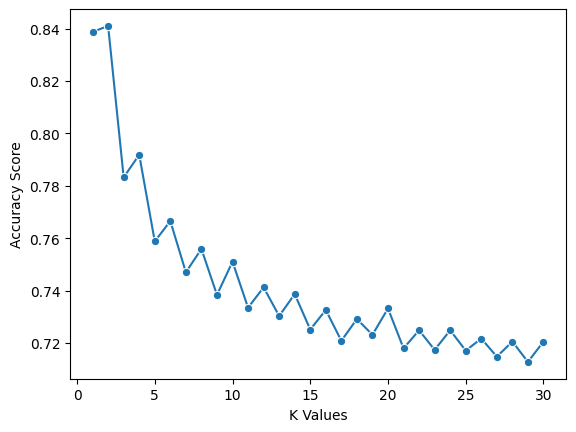

In [10]:
k_values = [i for i in range (1, 31)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_all, y_train_all['y'], cv=5)
    scores.append(np.mean(score))

sns.lineplot(x=k_values, y=scores, marker='o')
plt.xlabel('K Values')
plt.ylabel('Accuracy Score')
plt.savefig(
    ANALYSIS_DIR / 'images' / 'non-probabilistic-models' / f'knn_best_k{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)

In [11]:
k = np.argmax(scores)
k

1

## All features

### Training and score in the sample (79% - 0.00 std)

In [ ]:
knn_all = KNeighborsClassifier(n_neighbors=k)
knn_all_scores = cross_val_score(
    knn_all,
    X_train_all,
    y_train_all['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_all_scores.mean(),
    knn_all_scores.std())
)

### Out-of-sample score

In [ ]:
knn_all = KNeighborsClassifier(n_neighbors=k)
knn_all.fit(X_train_all, y_train_all['y'])
y_test_predict_knn_all = knn_all.predict(X_test_all)

print(classification_report(y_test_all['y'], y_test_predict_knn_all))

## Univariate - Mutual Information

### Training and score in the sample (77% - 0.00 std)

In [ ]:
knn_mi = KNeighborsClassifier(n_neighbors=k)
knn_mi_scores = cross_val_score(
    knn_mi,
    X_train_mi,
    y_train_mi['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_mi_scores.mean(),
    knn_mi_scores.std())
)

### Out-of-sample score

In [ ]:
knn_mi = KNeighborsClassifier(n_neighbors=k)
knn_mi.fit(X_train_mi, y_train_mi['y'])
y_test_predict_knn_mi = knn_mi.predict(X_test_mi)

print(classification_report(y_test_mi['y'], y_test_predict_knn_mi))

## Univariate - $\chi^2$

### Training and score in the sample (78% - 0.01 std)

In [ ]:
knn_x2 = KNeighborsClassifier(n_neighbors=k)
knn_x2_scores = cross_val_score(
    knn_x2,
    X_train_x2,
    y_train_x2['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_x2_scores.mean(),
    knn_x2_scores.std())
)

### Out-of-sample score

In [ ]:
knn_x2 = KNeighborsClassifier(n_neighbors=k)
knn_x2.fit(X_train_x2, y_train_x2['y'])
y_test_predict_knn_x2 = knn_x2.predict(X_test_x2)

print(classification_report(y_test_x2['y'], y_test_predict_knn_x2))

## Univariate - ANOVA

### Training and score in the sample (78% - 0.01 std)

In [ ]:
knn_anova = KNeighborsClassifier(n_neighbors=k)
knn_anova_scores = cross_val_score(
    knn_anova,
    X_train_anova,
    y_train_anova['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_anova_scores.mean(),
    knn_anova_scores.std())
)

### Out-of-sample score

In [ ]:
knn_anova = KNeighborsClassifier(n_neighbors=k)
knn_anova.fit(X_train_anova, y_train_anova['y'])
y_test_predict_knn_anova = knn_anova.predict(X_test_anova)

print(classification_report(y_test_anova['y'], y_test_predict_knn_anova))

## Multivariate - Relief

### Training and score in the sample (77% - 0.01 std)

In [ ]:
knn_relief = KNeighborsClassifier(n_neighbors=k)
knn_relief_scores = cross_val_score(
    knn_relief,
    X_train_relief,
    y_train_relief['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_relief_scores.mean(),
    knn_relief_scores.std())
)

### Out-of-sample score

In [ ]:
knn_relief = KNeighborsClassifier(n_neighbors=k)
knn_relief.fit(X_train_relief, y_train_relief['y'])
y_test_predict_knn_relief = knn_relief.predict(X_test_relief)

print(classification_report(y_test_relief['y'], y_test_predict_knn_relief))

## Wrapper

### Select features

In [12]:
if RUN_WRAPPER_SELECTION:
    knn_wrapper = KNeighborsClassifier(n_neighbors=k)

    knn_fs_wrapper = SequentialFeatureSelectorTransformer(
        knn_wrapper, n_features_to_select=75)

    print('Fitting model. This may take a while...')
    X_knn_wrapper = knn_fs_wrapper.fit_transform(X_all, y['y'])
    print('We have a winner!')

    X_train_knn_wrapper, X_test_knn_wrapper, y_train_knn_wrapper, y_test_knn_wrapper = split_train_test(X_knn_wrapper, y)
    X_knn_wrapper.to_parquet(STAGE_DIR / 'selection' / 'X_train_knn.parquet')

Fitting model. This may take a while...


### Training and score in the sample (80% - 0.01 std)

In [ ]:
if not RUN_WRAPPER_SELECTION:
    X_knn_wrapper = pd.read_parquet(STAGE_DIR / 'selection' / 'X_train_knn.parquet')
    X_train_knn_wrapper, X_test_knn_wrapper, y_train_knn_wrapper, y_test_knn_wrapper = split_train_test(X_knn_wrapper, y)

In [ ]:
knn_wrapper = KNeighborsClassifier(n_neighbors=k)
knn_wrapper_scores = cross_val_score(
    knn_wrapper,
    X_train_knn_wrapper,
    y_train_knn_wrapper['y'],
    cv=5
)

print("%0.2f accuracy with a standard deviation of %0.2f" % (
    knn_wrapper_scores.mean(),
    knn_wrapper_scores.std())
)

### Out-of-sample score

In [ ]:
knn_wrapper = KNeighborsClassifier(n_neighbors=k)
knn_wrapper.fit(X_train_knn_wrapper, y_train_knn_wrapper['y'])
y_test_predict_knn_wrapper = knn_wrapper.predict(X_test_knn_wrapper)

print(classification_report(y_test_knn_wrapper['y'], y_test_predict_knn_wrapper))

## Metrics summary

In [ ]:
y_true_prediction_knn = [
    (y_test_all, y_test_predict_knn_all),
    (y_test_mi, y_test_predict_knn_mi),
    (y_test_x2, y_test_predict_knn_x2),
    (y_test_anova, y_test_predict_knn_anova),
    (y_test_relief, y_test_predict_knn_relief),
    (y_test_knn_wrapper, y_test_predict_knn_wrapper),
]

metrics_knn_summary = pd.DataFrame(
    [precision_recall_fscore_support(y_true, y_predict, average='macro')[:-1]
     for y_true, y_predict in y_true_prediction_knn],
    index=[
        'All features',
        'Mutual information',
        'Chi squared',
        'ANOVA',
        'RELIEF',
        'Wrapper',
    ],
    columns=[
        'Precision', 'Recall', 'F-score'
    ]
)

metrics_knn_summary

In [ ]:
sns.lineplot(
    metrics_knn_summary.sort_values(['Precision', 'Recall', 'F-score']),
)
plt.xticks(rotation=20)
plt.savefig(
    ANALYSIS_DIR / 'images' / 'metrics' / f'metrics_knn{SUFIX}.pdf',
    dpi=300,
    bbox_inches='tight'
)